# World Bank API Data using [WBGAPI](https://pypi.org/project/wbgapi/) python library
##### Source: [Introducing WBGAPI: A new python package for accessing World Bank data](https://blogs.worldbank.org/opendata/introducing-wbgapi-new-python-package-accessing-world-bank-data) by Tim Herzog

In [4]:
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
# List of available databases
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2021-12-16
3,Worldwide Governance Indicators,WGI,3,2021-09-27
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-01-14
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2020-12-20
13,Enterprise Surveys,ESY,3,2021-04-02
14,Gender Statistics,GDS,3,2021-12-18
15,Global Economic Monitor,GEM,3,2020-07-27


In [109]:
# List of available data series from database #2
wb.series.info(db=2)

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [126]:
serbia_metadata = wb.economy.metadata.get('SRB')
serbia_metadata

Field,Value
2-alphacode,RS
BalanceofPaymentsManualinuse,BPM6
CurrencyUnit,New Serbian dinar
ExternaldebtReportingstatus,Actual
GovernmentAccountingconcept,Consolidated central government
IMFdatadisseminationstandard,Enhanced General Data Dissemination System (e-GDDS)
IncomeGroup,Upper middle income
Latestagriculturalcensus,2012
Latesthouseholdsurvey,"Multiple Indicator Cluster Survey, 2019"
Latestindustrialdata,2014


In [127]:
# Population in Serbia
population = wb.data.DataFrame('SP.POP.TOTL',economy='SRB', time=range(2005,2022),labels=True, index='time')
population = population.reset_index()
population = population.drop(columns='time').rename(columns={'SRB':'Population'})
population = population.set_index('Time')
population

,Population
Time,
2020,6908224.0
2019,6945235.0
2018,6982604.0
2017,7020858.0
2016,7058322.0
2015,7095383.0
2014,7130576.0
2013,7164132.0
2012,7199077.0


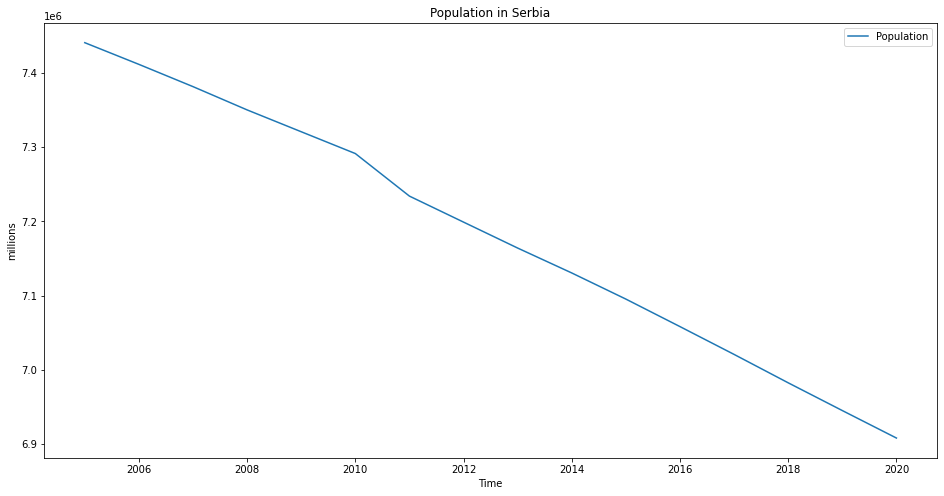

In [116]:
population.plot(figsize=(16,8), title = 'Population in Serbia', ylabel='millions').invert_xaxis()

In [121]:
# GDP % Chg in Serbia
gdp = wb.data.DataFrame('NY.GDP.MKTP.KD.ZG',economy='SRB', time=range(2005,2022),labels=True, index='time')
gdp = gdp.reset_index()
gdp = gdp.drop(columns='time').rename(columns={'SRB':'GDP % Chg'})
gdp = gdp.set_index('Time')
gdp

,GDP % Chg
Time,
2020,-0.944597
2019,4.331735
2018,4.495121
2017,2.101164
2016,3.338587
2015,1.806059
2014,-1.589510
2013,2.892637
2012,-0.681542


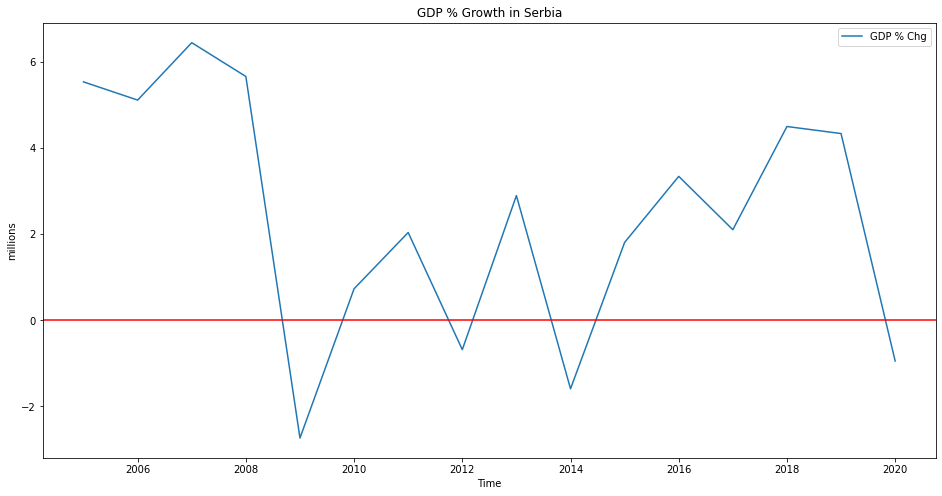

In [124]:
gdp.plot(figsize=(16,8), title = 'GDP % Growth in Serbia', ylabel='millions').invert_xaxis()
plt.axhline(0, color='r')